# Bank Term Deposit Predictor

A banking institution wants to develop a model that predicts whether a customer will subscribe to a term deposit or not based on their banking behaviour. They have collected a dataset of past customers with information about their demographics, account details, and whether they subscribed to a term deposit or not. We wants to build a model using Logistic Regression to predict whether a new customer will subscribe to a term deposit or not based on their banking behaviour.

## Dataset

The dataset used for this problem is the "Bank Marketing Data Set" which contains information on customers of a bank. The dataset includes 17 attributes such as customer demographics, account details, and whether the customer subscribed to a term deposit or not. Each customer is classified as either yes or no based on whether they subscribed to a term deposit or not.

### Setup


In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

print(tf.__version__)   

2.15.0


### Dataset loading and preprocessing

In [3]:
data_dir = "./bank-data/bank-full.csv"

df = pd.read_csv(data_dir, sep=';')

print(df.head())

print(df.shape)


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
(45211, 17)


### Preparing Train & Test data

In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]

y = df.iloc[:,-1]

x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

### Data analysis

In [5]:
#Frequency of 'subscribed'
y_train.value_counts()

y
no     31970
yes     4198
Name: count, dtype: int64

In [6]:
y_train.value_counts(normalize=True)
y_val.value_counts(normalize=True)

y
no     0.879354
yes    0.120646
Name: proportion, dtype: float64

job
blue-collar      7806
management       7500
technician       6096
admin.           4137
services         3350
retired          1815
self-employed    1286
entrepreneur     1178
unemployed       1023
housemaid        1002
student           742
unknown           233
Name: count, dtype: int64


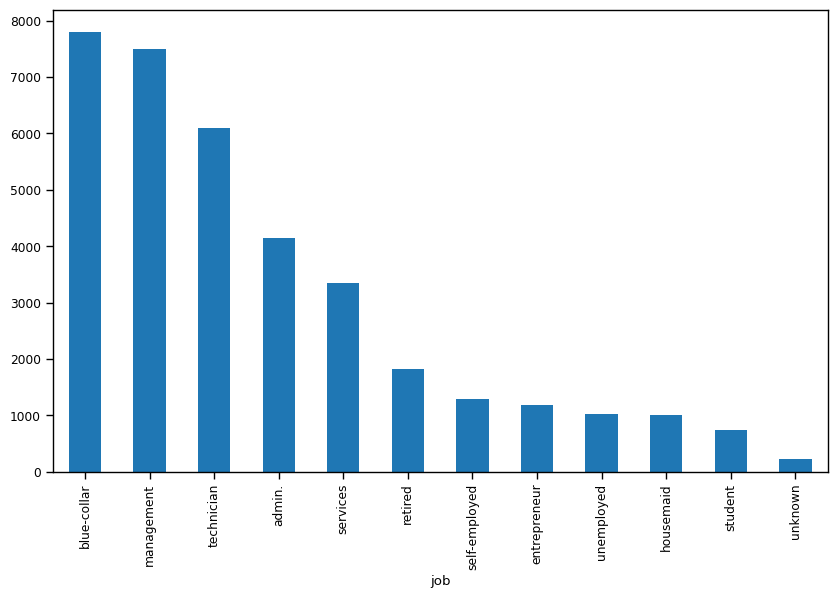

In [7]:
#Frequency table
print(x_train['job'].value_counts())
sns.set_context('paper')
x_train['job'].value_counts().plot(kind='bar', figsize=(10,6));





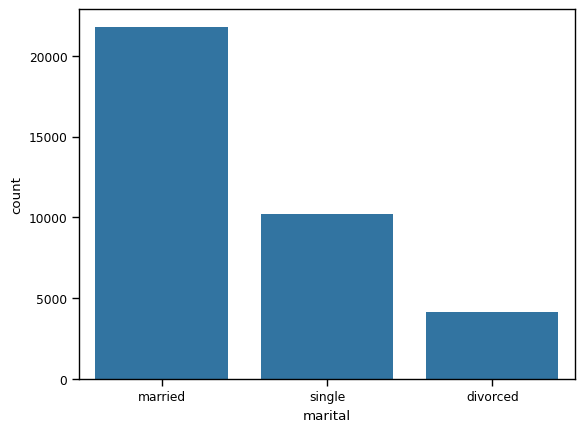

In [8]:
x_train['marital'].value_counts()
sns.countplot(data=x_train, x='marital');


In [9]:
#job vs subscribed
print(pd.crosstab(x_train['job'], y_train))

y                no   yes
job                      
admin.         3641   496
blue-collar    7242   564
entrepreneur   1076   102
housemaid       908    94
management     6484  1016
retired        1411   404
self-employed  1128   158
services       3046   304
student         535   207
technician     5433   663
unemployed      859   164
unknown         207    26


### Preparing dataset

In [10]:
y_train.replace('no', 0,inplace=True)
y_train.replace('yes', 1,inplace=True)
y_val.replace('no', 0,inplace=True)
y_val.replace('yes', 1,inplace=True)

x_train = pd.get_dummies(x_train)
x_val = pd.get_dummies(x_val)


x_train.head()


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3344,41,849,15,72,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True
17965,49,1415,30,269,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18299,42,3842,31,130,4,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
10221,37,-119,11,375,11,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
32192,56,3498,15,264,2,-1,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True


### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(x_train,y_train)
predictions = model.predict(x_val)

print('Accuracy:', accuracy_score(y_val,predictions))




Accuracy: 0.8891960632533451


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Result

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.61      0.23      0.33      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043

ROC auc score =  0.8528657047694046


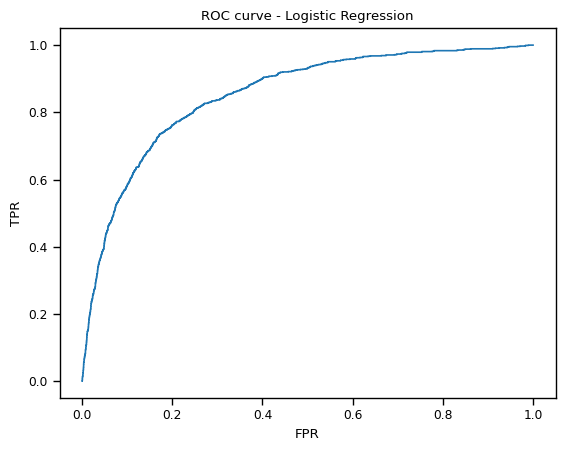

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
logistic_regression_predictions = model.predict_proba(x_val)[:,1]

print(classification_report(y_val, predictions))


logistic_regression_auc = roc_auc_score(y_val, logistic_regression_predictions)
logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(y_val, logistic_regression_predictions)
print("ROC auc score = ",roc_auc_score(y_val, logistic_regression_predictions))
plt.plot(logistic_regression_fpr, logistic_regression_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve - Logistic Regression')
plt.show()

In [48]:
print("ROC auc score = ",roc_auc_score(y_val, logistic_regression_predictions))

ROC auc score =  0.8528657047694046


|           | Precision | Recall  | F1-Score | Support |
|-----------|-----------|---------|----------|---------|
| Class 0   |   0.90    |  0.98   |   0.94   |  7952   |
| Class 1   |   0.61    |  0.23   |   0.33   |  1091   |
| Accuracy  |           |         |   0.89   |  9043   |
| Macro Avg |   0.76    |  0.60   |   0.63   |  9043   |
| Weighted Avg |  0.87   |  0.89   |   0.87   |  9043   |

ROC AUC Score: 0.8529



## Model Evaluation

- The accuracy score provided a measure of the model's overall correctness in predicting term deposit subscriptions.
- We Can see that Accuracy, F1 Score & Recall are very low in class 1, compared to class 0. That is because the support for class 1 is low, which means we do not have enough training examples which results into class 1. Hence, the metrics are low for class 1
- Additionally, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score were used to evaluate the model's performance in a binary classification setting.
- The ROC curve and AUC score provided insights into the model's ability to distinguish between positive and negative instances.

## Conclusion

In conclusion, the Logistic Regression model showed promise in predicting whether a customer will subscribe to a term deposit based on their banking behavior. The analysis and evaluation metrics provide a comprehensive understanding of the model's performance. Further refinement and tuning of the model parameters, as well as exploration of other machine learning algorithms, could enhance predictive accuracy. This model can be valuable for the banking institution in targeting potential term deposit subscribers based on their banking characteristics.